## 計測データの集計

In [115]:
import glob
from natsort import natsorted
import pandas as pd
import mdfreader
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'


In [116]:
files = glob.glob("./2023_0516_160039_414/*.mf4")

files = natsorted(files)

files

['./2023_0516_160039_414\\todo$0$0.mf4',
 './2023_0516_160039_414\\todo$0$1.mf4',
 './2023_0516_160039_414\\todo$0$2.mf4',
 './2023_0516_160039_414\\todo$0$3.mf4',
 './2023_0516_160039_414\\todo$0$4.mf4',
 './2023_0516_160039_414\\todo$0$5.mf4',
 './2023_0516_160039_414\\todo$0$6.mf4',
 './2023_0516_160039_414\\todo$0$7.mf4',
 './2023_0516_160039_414\\todo$0$8.mf4',
 './2023_0516_160039_414\\todo$0$9.mf4',
 './2023_0516_160039_414\\todo$0$10.mf4',
 './2023_0516_160039_414\\todo$0$11.mf4',
 './2023_0516_160039_414\\todo$0$12.mf4',
 './2023_0516_160039_414\\todo$0$13.mf4',
 './2023_0516_160039_414\\todo$0$14.mf4',
 './2023_0516_160039_414\\todo$0$15.mf4',
 './2023_0516_160039_414\\todo$0$16.mf4',
 './2023_0516_160039_414\\todo$0$17.mf4',
 './2023_0516_160039_414\\todo$0$18.mf4',
 './2023_0516_160039_414\\todo$0$19.mf4']

In [117]:
def GetSignal(files=[], target='Az12'):

    Time = []
    Az = []
    offset = 0.00

    for fname in files:
        yop = mdfreader.MdfInfo()
        signal_list = yop.list_channels(fname)
        inst = mdfreader.Mdf(fname, 
                            channel_list=signal_list, 
                            convert_after_read=False)

        for key in signal_list:
            if key.find(target) > 0:
                a = inst[key]['data']
                Az.extend(a[1:]) # 先頭のゼロデータは除外する
            if key in 'Time':
                t = inst[key]['data']
                t += offset
                Time.extend(t[1:]) # 先頭のゼロデータは除外する
        offset = t[-1]

    df = pd.DataFrame()

    df['Time'] = Time
    df['Az'] = Az

    df = df.set_index('Time')
    
    return df


<Axes: xlabel='Time'>

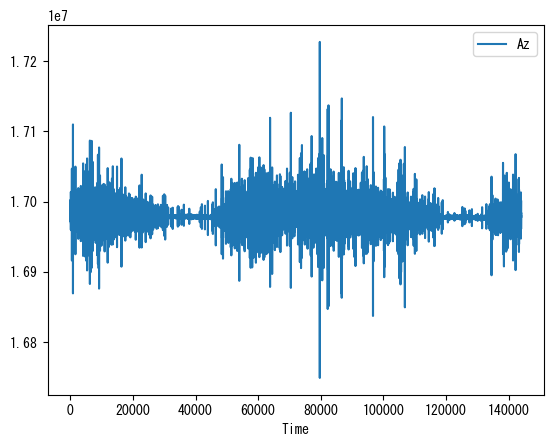

In [118]:
df = GetSignal(files)
df.plot()


In [278]:
def plot_spec(az, dt = 0.01, az_max=-1):
    # フーリエ変換
    F = np.fft.fft(az) 
    
    N = len(az)        # サンプル数
#     dt = 0.01          # サンプリング周期 [s]
    
    freq = np.fft.fftfreq(N) #, d=dt) # 周波数スケール
    
    # フーリエ変換の結果を正規化
    F = F / (N / 2)

    # 振幅スペクトル
    Amp = np.abs(F)
    fig, ax = plt.subplots()
    ax.plot(freq[:N//2], Amp[:N//2])
    ax.set_xlabel("振動数 [Hz]")
    ax.set_ylabel("振幅")
    ax.grid()
    
    if az_max > 0:
        plt.ylim(0, az_max)
        
    plt.show()
    

<Axes: xlabel='Time'>

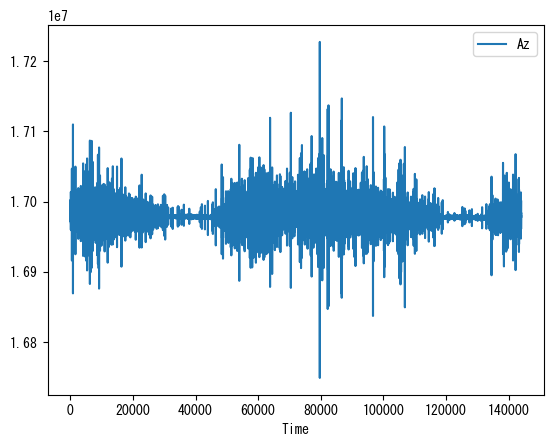

In [239]:
df2 = df.copy()

df2.plot()

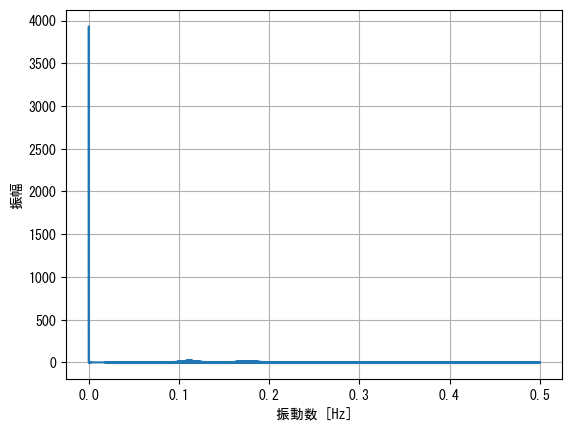

In [279]:
az = df2['Az'].values

# 正規化
az_norm = az - np.mean(az)
                                   
plot_spec(az_norm)

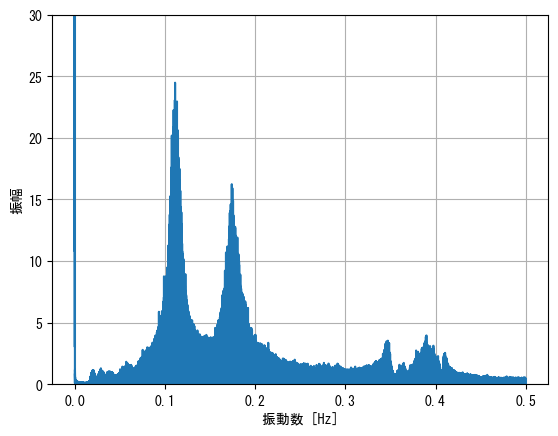

In [280]:
plot_spec(az_norm, az_max=30)